## Analiza letalskih nesreč

#### Priprava podatkov

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

PlaneCrashes = "./Podatki/PlaneCrashes.csv"
reader = csv.DictReader(open(PlaneCrashes, 'rt', encoding='utf-8'))

sample = csv.DictReader(open("./Podatki/sample.csv", 'rt', encoding='utf-8'))


### 1. Kako se število nesreč spreminja skozi čas?

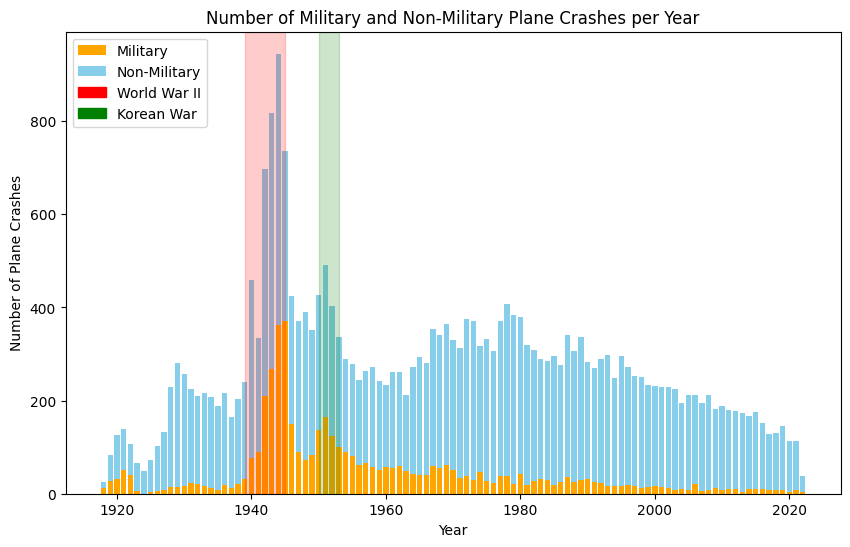

In [2]:
# Read the data
military_years = {}
total_years = {}

reader = csv.DictReader(open("./Podatki/PlaneCrashes.csv", 'rt', encoding='utf-8'))
for row in reader:
    datum = datetime.strptime(row['Date'], '%Y-%m-%d %H:%M:%S')
    flight_type = row['Flight type']
    if datum.year not in total_years:
        total_years[datum.year] = 1
        if flight_type == 'Military':
            military_years[datum.year] = 1
        else:
            military_years[datum.year] = 0
    else:
        total_years[datum.year] += 1
        if flight_type == 'Military':
            military_years[datum.year] += 1

x = list(total_years.keys())
y_total = [total_years[year] for year in x]
y_military = [military_years[year] for year in x]

# Plot the data
plt.figure(figsize=(10, 6))
bars_military = plt.bar(x, y_military, color='orange', label='Military')
bars_non_military = plt.bar(x, np.array(y_total) - np.array(y_military), bottom=y_military, color='skyblue', label='Non-Military')
plt.xlabel('Year')
plt.ylabel('Number of Plane Crashes')
plt.title('Number of Military and Non-Military Plane Crashes per Year')

# Annotate the most important wars and events
important_events = {
    "World War II": (1939, 1945),
    "Korean War": (1950, 1953)
    # Add more events if necessary
}

# Assign colors to each event
colors = ['red', 'green']  # You can add more colors if needed
color_map = {event: color for event, color in zip(important_events.keys(), colors)}

for event, years_range in important_events.items():
    plt.axvspan(years_range[0], years_range[1], color=color_map[event], alpha=0.2)

# Create legend
legend_labels = [bars_military, bars_non_military]
legend_labels.extend([plt.Rectangle((0,0),1,1, color=color_map[event]) for event in important_events.keys()])
legend_labels.extend(['Military', 'Non-Military'])
plt.legend(legend_labels, ['Military', 'Non-Military'] + list(important_events.keys()), loc='upper left')

plt.show()


### 6. Kako ura vpliva na nesreče?

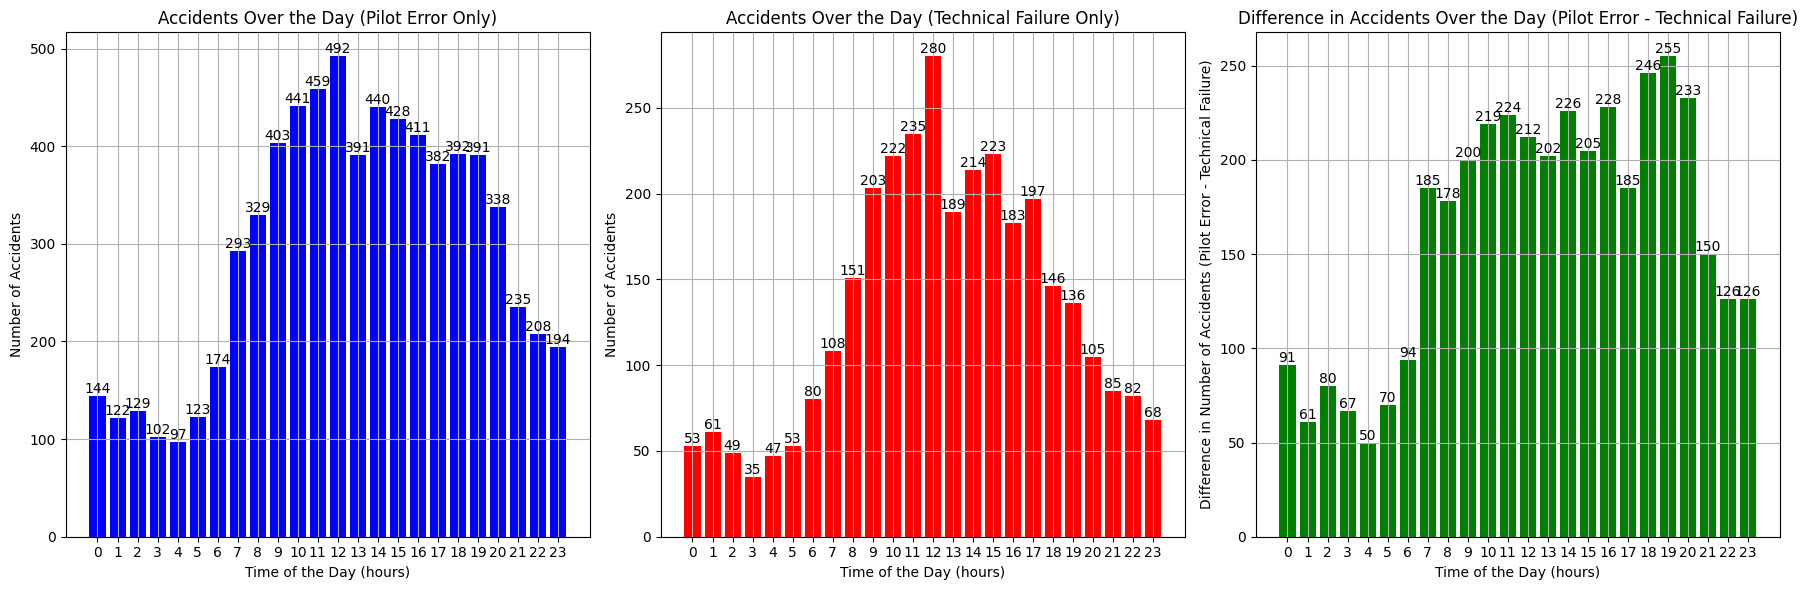

In [3]:
def read_data(filename, cause):
    times = []
    with open(filename, 'rt', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Crash cause'] == cause and row['Time']:
                time_components = row['Time'].split(" ")
                try:
                    if 'H' in time_components[0]:
                        hour = int(time_components[0][:-1])
                    else:
                        hour = 0
                    times.append(hour)
                except ValueError:
                    print("Invalid time format, skipping:", row['Time'])
    return times

def plot_data(times, title, color='b'):
    unique_hours, counts = np.unique(times, return_counts=True)
    plt.bar(unique_hours, counts, color=color)
    plt.xlabel('Time of the Day (hours)')
    plt.ylabel('Number of Accidents')
    plt.title(title)
    plt.xticks(np.arange(0, 24, step=1))
    plt.grid(True)
    for i in range(len(unique_hours)):
        plt.text(unique_hours[i], counts[i], str(counts[i]), ha='center', va='bottom')

def plot_difference(pilot_error_times, technical_failure_times):
    difference = np.subtract(np.bincount(pilot_error_times), np.bincount(technical_failure_times))
    plt.bar(np.arange(24), difference, color='g' if max(difference) >= 0 else 'r')
    plt.xlabel('Time of the Day (hours)')
    plt.ylabel('Difference in Number of Accidents (Pilot Error - Technical Failure)')
    plt.title('Difference in Accidents Over the Day (Pilot Error - Technical Failure)')
    plt.xticks(np.arange(0, 24, step=1))
    plt.grid(True)
    for i in range(24):
        plt.text(i, difference[i], str(difference[i]), ha='center', va='bottom')

pilot_error_times = read_data(PlaneCrashes, "Human factor")
technical_failure_times = read_data(PlaneCrashes, "Technical failure")

plt.figure(figsize=(18, 6))

# Graf za nesreče zaradi pilotne napake
plt.subplot(1, 3, 1)
plot_data(pilot_error_times, 'Accidents Over the Day (Pilot Error Only)', 'b')

# Graf za nesreče zaradi tehničnih napak
plt.subplot(1, 3, 2)
plot_data(technical_failure_times, 'Accidents Over the Day (Technical Failure Only)', 'r')

# Graf za razliko med nesrečami zaradi pilotne napake in tehničnih napak
plt.subplot(1, 3, 3)
plot_difference(pilot_error_times, technical_failure_times)

plt.tight_layout()
plt.show()
